# Sentiment Analysis using Python (Part II - Doc2vec vs Word2vec)


This tutorial is the second part of sentiment analysis task, we are going to the a comparison of word2vec model and doc2vec, so before jumping into this, let's give some brief inroduction about those two techniques.


## Word2vec

Word2vec are estimations of word representations in vector space developed by Mikolov & Al. It provides an efficient implementation of the continuous bag of words and skip-gram models for computing vector representations of words. Those are the two main learning algorithms for distributed representations of words whose aim is to minimize computational complexity.

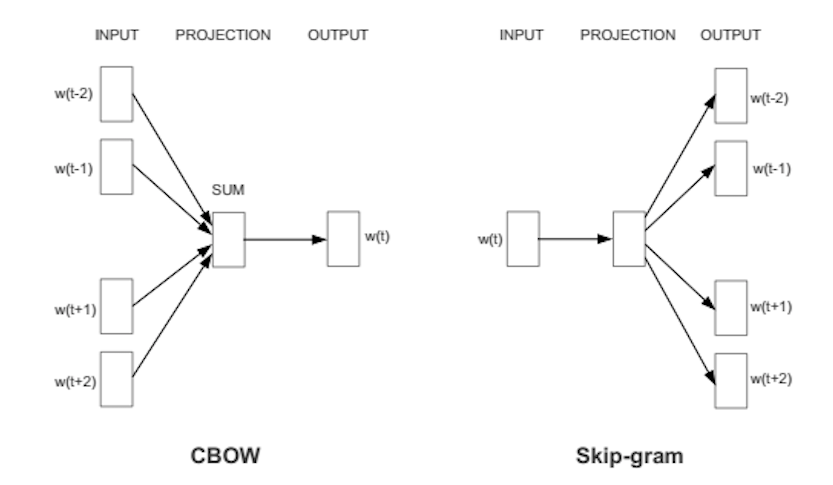

### The Continuous Bag of Words CBOW

Where the non-linear hidden layer is removed and the projection layer is shared for all words. This model predicts the current word based on the N words both before and after it. E.g. Given N=2, the model is as the figure 1 showed. And by ignoring the order of words in the sequence, CBOW uses the average value of the word embedding of the context to predict the current word.

### The Skip-gram model

Which is similar to CBOW, but instead of predicting the word from context, it tries to maximize the classification of a word based on another word in the same sentence. The Skip-gram architecture works a little less well on the syntax task than on the CBOW model, but much better on the semantic part of the test than all the other models.

## Doc2vec

Doc2vec is an extended model that go beyond word level to achieve document-level representations. This model represents one of the skip-gram techniques previously presented, in order to remove the limitations of the vector representations of the words, correspond to the composition of the meaning of each of its individual words. 


### Distributed Memory - DM

This model is analogous to CBOW model in Word2vec. The paragraph vectors are obtained by training a neural network on the task of inferring a center word based on context words and a context paragraph. Mikolove & Al. have implemented DM model in two different ways, using avearage calculation process, or concatenating calculation method. (DMC and DMM) 

### Distributed Bag of Words - DBOW 
This model is analogus to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

In our tutorial, inorder to bet the vectors of each row, we will implement and compare using a Python library Gensim, the models below:

- Word2vec
- DBOW (Distributed Bag of Words)
- DMC (Distributed Memory Concatenated)
- DMM (Distributed Memory Mean)
- DBOW + DMC
- DBOW + DMM

Those representations takes our dataset as input and produces the word vectors as output. They first construct a vocabulary from the training text data and then learn vector representation of words. The resulting vectors can be used as features in the next step for sentiment analysis where we use simple Neural Network for training, and evaluated the result on the validation set.

Let's begin :)

Firstly we load the cleaned data (see previous part <a href="">here</a>), then split our data into training and validation set.


In [1]:
import os
import sys
import gensim
import pandas as pd
from gensim.models.doc2vec import LabeledSentence
csv = '~/clean_data.csv'
data = pd.read_csv(csv,index_col=0)
data.head()

/home/oumaima/.local/lib/python2.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


,SentimentText,Sentiment
0,hopefully my future phone but i doubt it it s ...,1
1,ugh my head too many margaritas for a monday c...,0
2,are you kidding me fucking a gimme a bit bb my...,0
3,i plan on watching the fast and the furious la...,0
4,lmao histericly even the voicemails i woke up ...,1


In [2]:
from sklearn.cross_validation import train_test_split
SEED = 2000

x_train, x_validation, y_train, y_validation = train_test_split(data.SentimentText, data.Sentiment, test_size=.2, random_state=SEED)

/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Next, we can labelise each text with unique ID using Gensim’s LabeledSentence function as shown below, and then concatenat the training and validation set for word representation, that's because word2vec and doc2vec training is completely unsupervised and thus there is no need to hold out any data, as it is unlabelled.

In [3]:
def labelize_text(text,label):
    result = []
    prefix = label
    for i, t in zip(text.index, text):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_validation])

all_x_w2v = labelize_text(all_x, 'ALL')
x_train = labelize_text(x_train, 'TRAIN')
x_validation = labelize_text(x_validation, 'TEST')

/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


AttributeError: 'float' object has no attribute 'split'

Now let's train our first model word2vec from our corpus, we put the size the output vectore to 200.

In [4]:
from gensim.models.word2vec import Word2Vec
from tqdm import tqdm
from sklearn import utils
import numpy as np

model_w2v = Word2Vec(size=200, min_count=10)
model_w2v.build_vocab([x.words for x in tqdm(all_x_w2v)])
model_w2v.train([x.words for x in tqdm(all_x_w2v)], total_examples=len(all_x_w2v), epochs=1)

100%|██████████| 25000/25000 [00:00<00:00, 1576094.99it/s]


(3005282, 3344822)

After training our model, we can use it now to convert words to vectors like the example below.

In [5]:
model_w2v['good']

/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.20356634e-01,  2.01620758e-01, -1.49855584e-01, -1.40032262e-01,
        1.33756369e-01, -1.46120414e-01,  1.61332116e-02,  3.75851810e-01,
       -3.81415725e-01, -1.04741082e-01,  1.77621603e-01,  2.08926678e-01,
       -2.01129168e-01, -5.88219702e-01, -2.75223494e-01,  2.28985444e-01,
        4.71457034e-01, -2.32448816e-01, -7.47165024e-01,  1.13800988e-01,
       -1.55947626e-01, -1.87482730e-01,  7.93265164e-01, -3.64849031e-01,
        3.63337100e-01,  3.60409796e-01,  3.95269319e-02, -1.90919176e-01,
        1.82287887e-01, -9.35876667e-01, -7.91697577e-02,  1.46627193e-02,
        5.75117290e-01,  5.12551188e-01,  3.68642509e-01,  3.23042035e-01,
       -1.96927309e-01,  9.48887691e-02, -2.07873210e-01, -1.22796237e+00,
       -1.13961753e-03, -6.05956241e-02, -4.02263738e-02,  2.65230179e-01,
        1.41605094e-01,  8.53969678e-02, -1.47209808e-01,  2.22812429e-01,
        6.34986639e-01, -7.47983009e-02, -2.07454100e-01, -6.92057669e-01,
       -1.21512577e-01, -

We can use the result of the training to extract the similarities of a given word as well.

In [6]:
model_w2v.most_similar('good')

/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('pretty', 0.9664363861083984),
 ('bad', 0.9530471563339233),
 ('overall', 0.9463253617286682),
 ('funny', 0.9402731657028198),
 ('decent', 0.9402391910552979),
 ('terrible', 0.9394140243530273),
 ('awful', 0.9358768463134766),
 ('lulls', 0.9338871240615845),
 ('cheesy', 0.9223247170448303),
 ('horrible', 0.9191421866416931)]

## Data viz

We can also projected our vocabulary in a vector space model  which represent embed words in a continuous vector space where semantically similar words are mapped to nearby points. We have visualized the learned vectors by projecting them down into 2 dimensions by using the t-SNE dimensionality reduction technique and using an interactive visualization tool called Bokeh. 

In [7]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

word_vec = [model_w2v[w] for w in model_w2v.wv.vocab.keys()[:5000]]

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vec)

tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = model_w2v.wv.vocab.keys()[:5000]

plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.050s...
[t-SNE] Computed neighbors for 5000 samples in 4.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.027020
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.628098
[t-SNE] Error after 1000 iterations: 1.393853


When we inspect these visualizations (Zoom in Zoom out) it becomes apparent that the vectors capture some general, and in fact quite useful, semantic information about words and their relationships to one another. It was very interesting when we first discovered that certain directions in the induced vector space specialize towards some semantic relationships. 

## Sentiment classification

In order to classify the sentiments of the reviews in our data, we have to turn them also into vectors.
The simplest way to represent a sentence is to consider it as the sum of all words without regarding word orders. Yet, in our tutorial we utilize Vector weighted average of words with their TF-IDF where each weight gives the importance of the word with respect to the corpus, and decrease the influence of the most common words.
According to Kenter and Al., averaging word embeddings of all words in a text has proven to be a strong baseline or feature across a multitude of NLP tasks.

Let's build our a tf-idf matrix, then define the funtion that creates an averaged review vector.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in all_x_w2v])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

def build_Word_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            
            continue
    if count != 0:
        vec /= count
    return vec


We can now convert our training and validation set into list of vectors using the previous function. We also scale each column to have zero mean and unit standard deviation.
After that, we feed our neural network with the resulted vectores, this network compose of three hiden layers, each with 256 nodes. Then, after the training we willevaluate it on the validation set.

In [9]:
from sklearn.preprocessing import scale
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve


train_vecs_w2v = np.concatenate([build_Word_Vector(z, 200) for z in tqdm(map(lambda x: x.words, x_train))])
train_vecs_w2v = scale(train_vecs_w2v)
val_vecs_w2v = np.concatenate([build_Word_Vector(z, 200) for z in tqdm(map(lambda x: x.words, x_validation))])
val_vecs_w2v = scale(val_vecs_w2v)


model = Sequential()
model.add(Dense(256, activation='relu', input_dim=200))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_vecs_w2v, y_train, epochs=100, batch_size=32, verbose=2)

score = model.evaluate(val_vecs_w2v, y_validation, batch_size=128, verbose=2)
y_pred= keras_model.predict(val_vecs_w2v).ravel()
fpr, tpr, _ = roc_curve(y_validation, y_pred)

print score[1]
print fpr[1]

/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
  0%|          | 0/20000 [00:00<?, ?it/s]/home/oumaima/anaconda2/envs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
100%|██████████| 5000/5000 [00:14<00:00, 355.32it/s]


Epoch 1/100
 - 4s - loss: 0.5844 - acc: 0.6947
Epoch 2/100
 - 3s - loss: 0.5455 - acc: 0.7248
Epoch 3/100
 - 3s - loss: 0.5271 - acc: 0.7378
Epoch 4/100
 - 4s - loss: 0.5204 - acc: 0.7440
Epoch 5/100
 - 4s - loss: 0.5108 - acc: 0.7539
Epoch 6/100
 - 3s - loss: 0.5046 - acc: 0.7583
Epoch 7/100
 - 4s - loss: 0.5021 - acc: 0.7594
Epoch 8/100
 - 4s - loss: 0.4980 - acc: 0.7613
Epoch 9/100
 - 4s - loss: 0.4962 - acc: 0.7618
Epoch 10/100
 - 4s - loss: 0.4905 - acc: 0.7630
Epoch 11/100
 - 4s - loss: 0.4899 - acc: 0.7644
Epoch 12/100
 - 4s - loss: 0.4879 - acc: 0.7661
Epoch 13/100
 - 4s - loss: 0.4845 - acc: 0.7697
Epoch 14/100
 - 4s - loss: 0.4814 - acc: 0.7729
Epoch 15/100
 - 4s - loss: 0.4801 - acc: 0.7740
Epoch 16/100
 - 4s - loss: 0.4753 - acc: 0.7744
Epoch 17/100
 - 4s - loss: 0.4746 - acc: 0.7767
Epoch 18/100
 - 4s - loss: 0.4711 - acc: 0.7784
Epoch 19/100
 - 4s - loss: 0.4686 - acc: 0.7774
Epoch 20/100
 - 4s - loss: 0.4656 - acc: 0.7803
Epoch 21/100
 - 4s - loss: 0.4631 - acc: 0.7807
E

The accuracy of the model using word2vec is **72.42%**, and this is quiet good, let's compare it with other Doc2vec models.

## Distributed Bag Of Words - DBOW

In the Doc2vec model, a word vector W is generated for each word, and a document vector D is generated for each document. The model also trains weights for a softmax hidden layer. we will use next the same steps used in the previous word2vec model, Training, averaging the vectors, feeding the neural network...

In [ ]:
from gensim.models import Doc2Vec
import multiprocessing

cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_x_w2v)])
model_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)

def build_doc_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_dbow[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

train_vecs_dbow = np.concatenate([build_doc_Vector(z, 100) for z in tqdm(map(lambda x: x.words, x_train))])
train_vecs_dbow = scale(train_vecs_dbow)
val_vecs_dbow = np.concatenate([build_doc_Vector(z, 100) for z in tqdm(map(lambda x: x.words, x_validation))])
val_vecs_dbow = scale(val_vecs_dbow)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_vecs_dbow, y_train, epochs=100, batch_size=32, verbose=2)
score = model.evaluate(val_vecs_dbow, y_validation, batch_size=128, verbose=2)

print score[1]

Unfortunately, the accuracy on the validation set turned out to be **61.72%**, which is a bit disappointing.But this model actually faster and consumes less memory, since there is no need to save the word vectors.

## Distributed Memory Concatenation - DMC 


Now we move to Distributed Memory model, we will first try with concatenation method for training.

In [13]:
cores = multiprocessing.cpu_count()
model_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmc.build_vocab([x for x in tqdm(all_x_w2v)])
model_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)

def build_doc_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_dmc[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

  
train_vecs_dmc = np.concatenate([build_doc_Vector(z, 100) for z in tqdm(map(lambda x: x.words, x_train))])
train_vecs_dmc = scale(train_vecs_dmc)


val_vecs_dmc = np.concatenate([build_doc_Vector(z, 100) for z in tqdm(map(lambda x: x.words, x_validation))])
val_vecs_dmc = scale(val_vecs_dmc)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_vecs_dmc, y_train, epochs=100, batch_size=32, verbose=2)
score = model.evaluate(val_vecs_dmc, y_validation, batch_size=128, verbose=2)

print score[1]

100%|██████████| 5000/5000 [00:09<00:00, 503.43it/s]


Epoch 1/100
 - 3s - loss: 0.4308 - acc: 0.8052
Epoch 2/100
 - 3s - loss: 0.3864 - acc: 0.8292
Epoch 3/100
 - 3s - loss: 0.3649 - acc: 0.8363
Epoch 4/100
 - 3s - loss: 0.3425 - acc: 0.8456
Epoch 5/100
 - 4s - loss: 0.3095 - acc: 0.8631
Epoch 6/100
 - 3s - loss: 0.2734 - acc: 0.8800
Epoch 7/100
 - 3s - loss: 0.2316 - acc: 0.8982
Epoch 8/100
 - 3s - loss: 0.1847 - acc: 0.9234
Epoch 9/100
 - 3s - loss: 0.1475 - acc: 0.9419
Epoch 10/100
 - 3s - loss: 0.1149 - acc: 0.9530
Epoch 11/100
 - 3s - loss: 0.0953 - acc: 0.9643
Epoch 12/100
 - 3s - loss: 0.0785 - acc: 0.9707
Epoch 13/100
 - 3s - loss: 0.0665 - acc: 0.9752
Epoch 14/100
 - 3s - loss: 0.0628 - acc: 0.9777
Epoch 15/100
 - 3s - loss: 0.0513 - acc: 0.9809
Epoch 16/100
 - 3s - loss: 0.0531 - acc: 0.9806
Epoch 17/100
 - 3s - loss: 0.0390 - acc: 0.9856
Epoch 18/100
 - 3s - loss: 0.0473 - acc: 0.9830
Epoch 19/100
 - 3s - loss: 0.0372 - acc: 0.9875
Epoch 20/100
 - 3s - loss: 0.0446 - acc: 0.9843
Epoch 21/100
 - 3s - loss: 0.0314 - acc: 0.9899
E

The accuracy tested on the validation set with the 3 layers neural network is 79.44%. It seems like it’s doing its job.

## Distributed Memory Mean - DMM 

we can try another method of training DM model.

In [15]:
cores = multiprocessing.cpu_count()
model_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(all_x_w2v)])
model_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)

def build_doc_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_dmm[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

  
train_vecs_dmm = np.concatenate([build_doc_Vector(z, 100) for z in tqdm(map(lambda x: x.words, x_train))])
train_vecs_dmm = scale(train_vecs_dmm)

val_vecs_dmm = np.concatenate([build_doc_Vector(z, 100) for z in tqdm(map(lambda x: x.words, x_validation))])
val_vecs_dmm = scale(val_vecs_dmm)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_vecs_dmm, y_train, epochs=100, batch_size=32, verbose=2)
score = model.evaluate(val_vecs_dmm, y_validation, batch_size=128, verbose=2)
print score[1]


100%|██████████| 5000/5000 [00:09<00:00, 504.96it/s]


Epoch 1/100
 - 3s - loss: 0.4003 - acc: 0.8224
Epoch 2/100
 - 3s - loss: 0.3660 - acc: 0.8414
Epoch 3/100
 - 3s - loss: 0.3533 - acc: 0.8469
Epoch 4/100
 - 3s - loss: 0.3348 - acc: 0.8536
Epoch 5/100
 - 3s - loss: 0.3192 - acc: 0.8629
Epoch 6/100
 - 3s - loss: 0.2980 - acc: 0.8705
Epoch 7/100
 - 3s - loss: 0.2745 - acc: 0.8829
Epoch 8/100
 - 3s - loss: 0.2495 - acc: 0.8959
Epoch 9/100
 - 3s - loss: 0.2179 - acc: 0.9085
Epoch 10/100
 - 3s - loss: 0.1896 - acc: 0.9213
Epoch 11/100
 - 3s - loss: 0.1637 - acc: 0.9329
Epoch 12/100
 - 3s - loss: 0.1425 - acc: 0.9421
Epoch 13/100
 - 3s - loss: 0.1188 - acc: 0.9530
Epoch 14/100
 - 3s - loss: 0.1068 - acc: 0.9582
Epoch 15/100
 - 3s - loss: 0.0884 - acc: 0.9659
Epoch 16/100
 - 3s - loss: 0.0827 - acc: 0.9682
Epoch 17/100
 - 3s - loss: 0.0682 - acc: 0.9738
Epoch 18/100
 - 3s - loss: 0.0666 - acc: 0.9756
Epoch 19/100
 - 3s - loss: 0.0628 - acc: 0.9759
Epoch 20/100
 - 3s - loss: 0.0600 - acc: 0.9788
Epoch 21/100
 - 3s - loss: 0.0402 - acc: 0.9857
E

The validation set accuracy is 80.24%, which is much better than DMC model and DBOW model. 

## Combined Model DBOW + DMC

In this part, we can concatenate the previous doc2vec models to see how it affects the performance. se we define a simple function to concatenate document vectors from different models as shown below.

In [17]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs
  
train_vecs_dbow_dmc = get_concat_vectors(model_dbow,model_dmc, x_train, 200)
val_vecs_dbow_dmc = get_concat_vectors(model_dbow,model_dmc, x_validation, 200)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=200))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_vecs_dbow_dmc, y_train, epochs=100, batch_size=32, verbose=2)
score = model.evaluate(val_vecs_dbow_dmc, y_validation, batch_size=128, verbose=2)

print score[1]


100%|██████████| 5000/5000 [00:15<00:00, 326.66it/s]


Epoch 1/100
 - 3s - loss: 0.4344 - acc: 0.8019
Epoch 2/100
 - 3s - loss: 0.3676 - acc: 0.8389
Epoch 3/100
 - 3s - loss: 0.3224 - acc: 0.8610
Epoch 4/100
 - 3s - loss: 0.2691 - acc: 0.8861
Epoch 5/100
 - 3s - loss: 0.2035 - acc: 0.9159
Epoch 6/100
 - 3s - loss: 0.1435 - acc: 0.9422
Epoch 7/100
 - 3s - loss: 0.1033 - acc: 0.9601
Epoch 8/100
 - 3s - loss: 0.0806 - acc: 0.9693
Epoch 9/100
 - 3s - loss: 0.0632 - acc: 0.9772
Epoch 10/100
 - 3s - loss: 0.0549 - acc: 0.9800
Epoch 11/100
 - 3s - loss: 0.0461 - acc: 0.9829
Epoch 12/100
 - 3s - loss: 0.0397 - acc: 0.9856
Epoch 13/100
 - 3s - loss: 0.0390 - acc: 0.9869
Epoch 14/100
 - 3s - loss: 0.0328 - acc: 0.9890
Epoch 15/100
 - 3s - loss: 0.0346 - acc: 0.9881
Epoch 16/100
 - 3s - loss: 0.0382 - acc: 0.9872
Epoch 17/100
 - 3s - loss: 0.0341 - acc: 0.9874
Epoch 18/100
 - 3s - loss: 0.0336 - acc: 0.9879
Epoch 19/100
 - 3s - loss: 0.0283 - acc: 0.9901
Epoch 20/100
 - 3s - loss: 0.0278 - acc: 0.9902
Epoch 21/100
 - 3s - loss: 0.0246 - acc: 0.9912
E

The accuracy for DBOW + DMC model is 79.56%, which has improved from pure DBOW model and DMC model. 
Let’s try the combination DBOW and DMM.


In [18]:
train_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_train, 200)
val_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_validation, 200)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=200))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_vecs_dbow_dmm, y_train, epochs=100, batch_size=32, verbose=2)
score = model.evaluate(val_vecs_dbow_dmm, y_validation, batch_size=128, verbose=2)

print score[1]

100%|██████████| 5000/5000 [00:15<00:00, 330.20it/s]


Epoch 1/100
 - 3s - loss: 0.4085 - acc: 0.8184
Epoch 2/100
 - 3s - loss: 0.3508 - acc: 0.8492
Epoch 3/100
 - 3s - loss: 0.3138 - acc: 0.8659
Epoch 4/100
 - 3s - loss: 0.2711 - acc: 0.8836
Epoch 5/100
 - 3s - loss: 0.2203 - acc: 0.9073
Epoch 6/100
 - 3s - loss: 0.1682 - acc: 0.9324
Epoch 7/100
 - 3s - loss: 0.1246 - acc: 0.9509
Epoch 8/100
 - 3s - loss: 0.0931 - acc: 0.9634
Epoch 9/100
 - 3s - loss: 0.0759 - acc: 0.9709
Epoch 10/100
 - 3s - loss: 0.0601 - acc: 0.9779
Epoch 11/100
 - 3s - loss: 0.0483 - acc: 0.9823
Epoch 12/100
 - 3s - loss: 0.0475 - acc: 0.9829
Epoch 13/100
 - 3s - loss: 0.0452 - acc: 0.9842
Epoch 14/100
 - 3s - loss: 0.0422 - acc: 0.9852
Epoch 15/100
 - 3s - loss: 0.0295 - acc: 0.9905
Epoch 16/100
 - 3s - loss: 0.0352 - acc: 0.9869
Epoch 17/100
 - 3s - loss: 0.0347 - acc: 0.9879
Epoch 18/100
 - 3s - loss: 0.0345 - acc: 0.9873
Epoch 19/100
 - 3s - loss: 0.0267 - acc: 0.9915
Epoch 20/100
 - 3s - loss: 0.0273 - acc: 0.9907
Epoch 21/100
 - 3s - loss: 0.0282 - acc: 0.9905
E

The accuracy of this combination is 81.66, which is far better than all the previous models.

A summary of the results in this tutorial is given below.

| Model | Accuracy |
| --- | --- |
| Word2vec | 72.42% | 
| Dbow | 61.72% |
| DMC | 79.44% |
| DMM | 80.24% |
| DBOW + DMC | 79.56% |
| DBOW + DMM | 81.66% |


In the next part, we will implement and compare the Convolutional Neural Network and LSTM models for our task sentiment analysis.

Thanks for your reading :)
